In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster')

In [4]:
d = np.load('/artemis/detectors/archive/2016-04-22-stanford-almn-cpw-scan.npz')

In [5]:
d.keys()

['freq', 's21']

In [6]:
freq = d['freq']
s21 = d['s21']

(-20, 22)

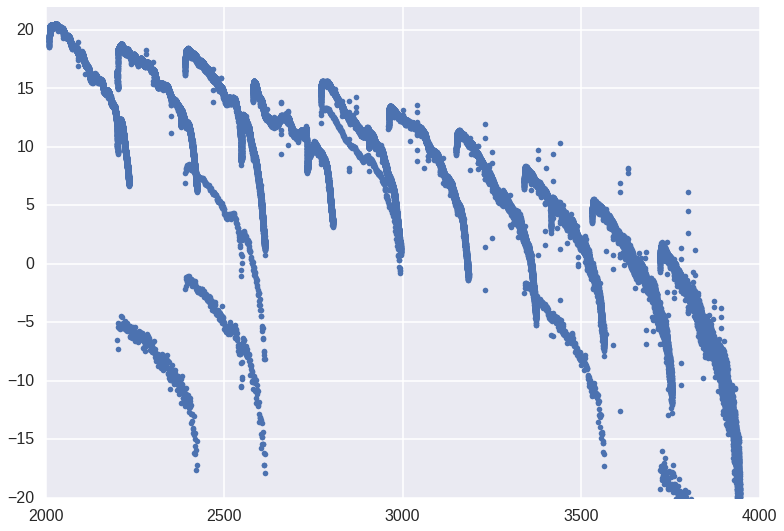

In [41]:
plot(freq.flatten(),20*np.log10(np.abs(s21).flatten()),'.')
ylim(-20,22)

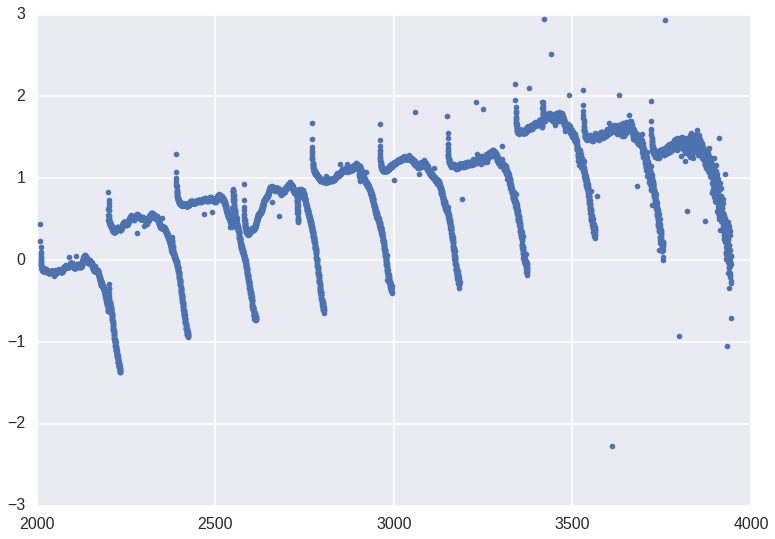

In [8]:
plot(freq.T.flatten()[::16],(np.angle(s21*np.exp(-1j*freq*2*np.pi*0.3784)).T.flatten())[::16],'.')
#xlim(3412,3421)

In [38]:
fr = freq.T.flatten()[::8]
s21c = ((s21*np.exp(-1j*freq*2*np.pi*0.3784)).T.flatten())[::8]
#s21c = s21.T.flatten()[::16]

In [36]:
f0s = np.array([2201.8,
               2378.8,
               2548.9,
               2731.5,
               2905.1,
               3416.0,
               ])

In [17]:
from kid_readout.analysis.resonator import lmfit_resonator

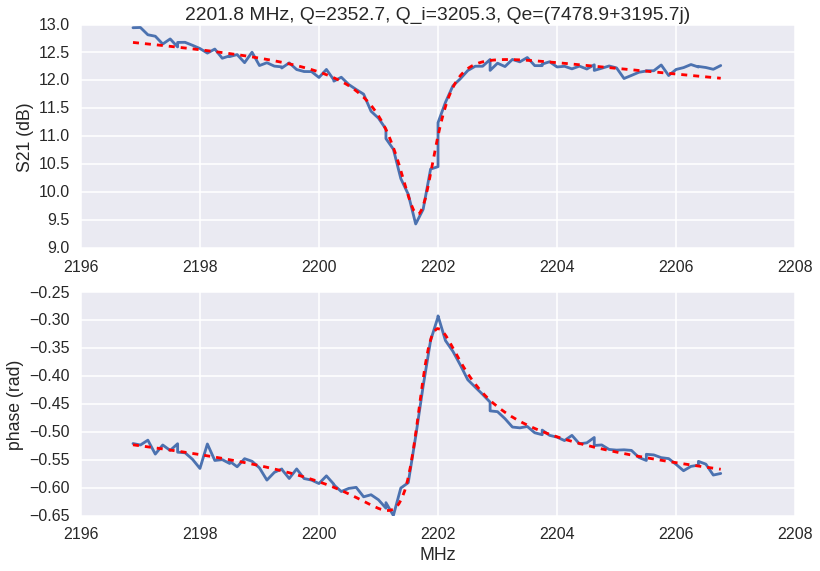

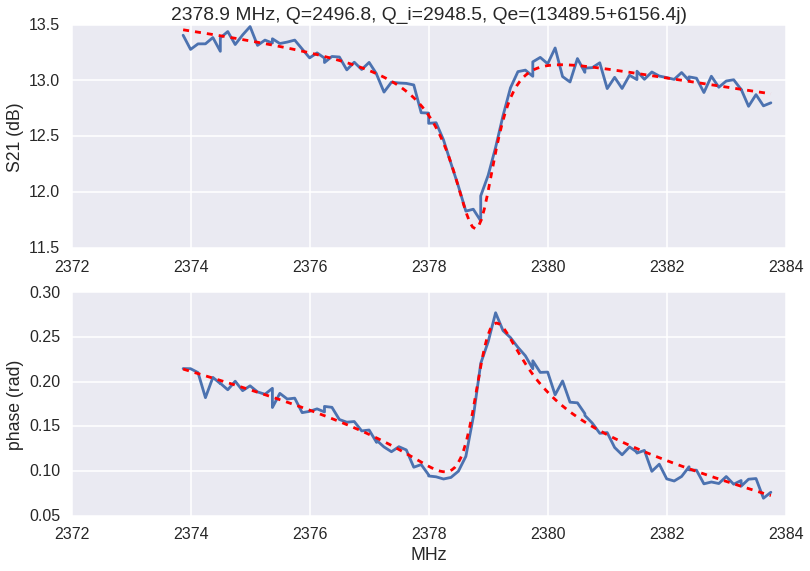

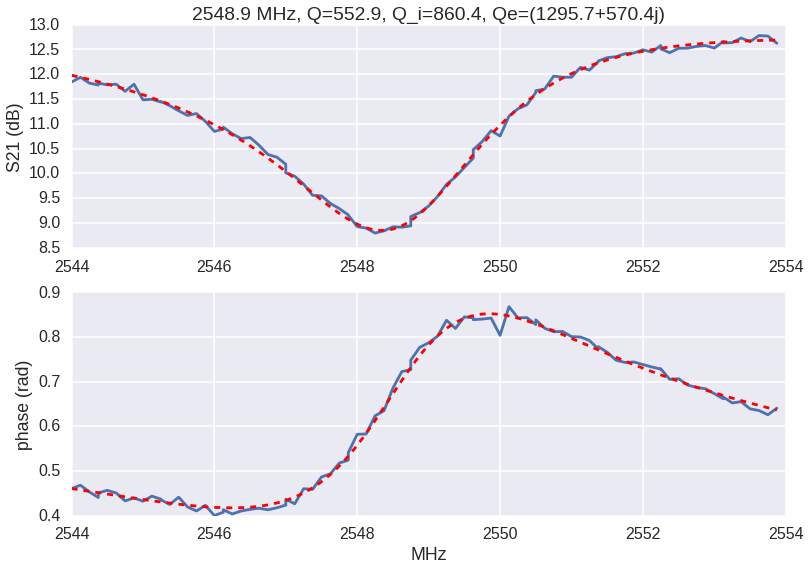

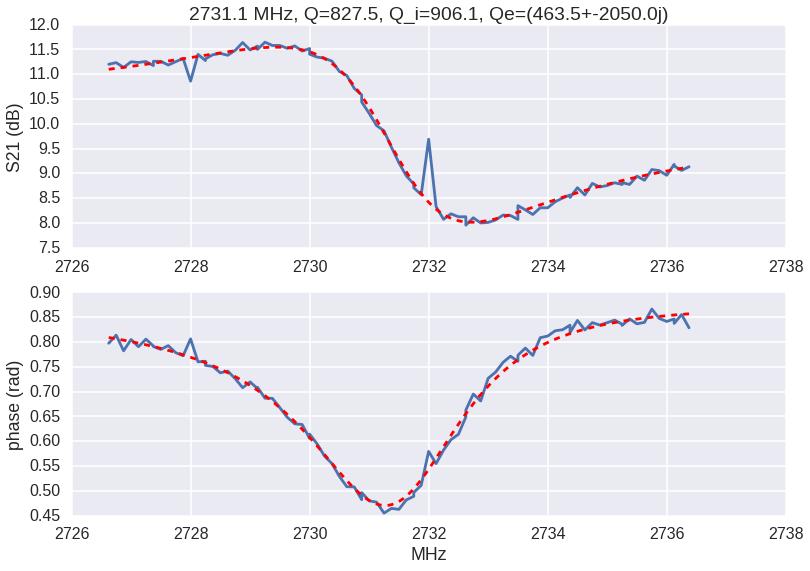

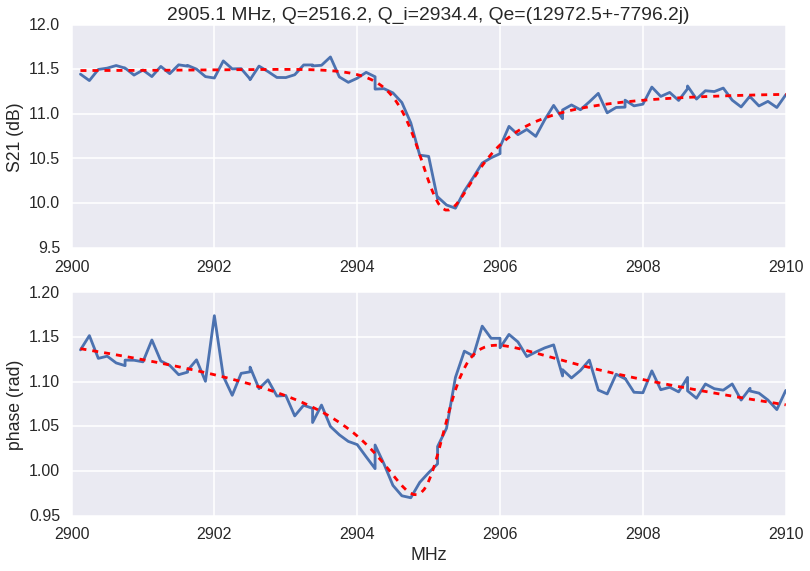

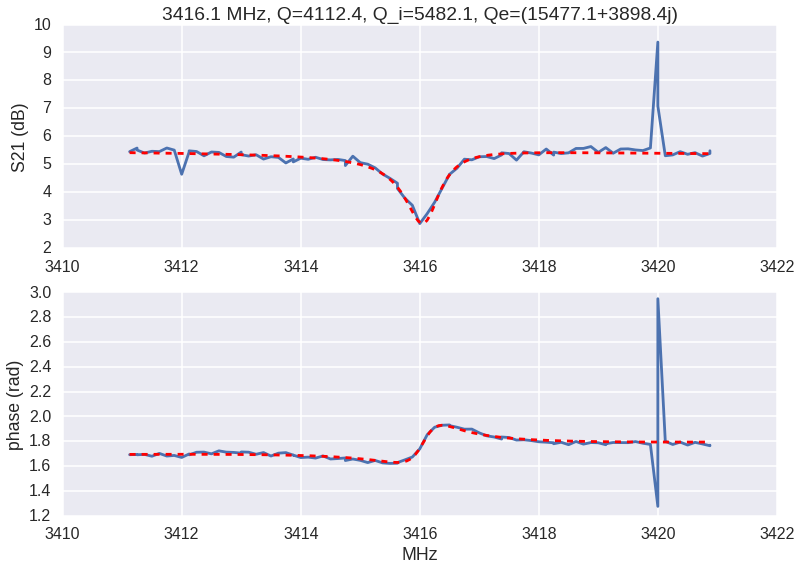

In [39]:
for k,f_0 in enumerate(f0s):
    figure()
    mask = np.abs(fr-f_0) < 5.0
    this_fr = fr[mask]
    this_s21 = s21c[mask]
    if np.any(np.diff(this_fr)<0):
        start = np.flatnonzero(np.diff(this_fr)<0)[0]+1
        this_fr = this_fr[start:]
        this_s21 = this_s21[start:]
    subplot(211)
    plot(this_fr,20*np.log10(np.abs(this_s21)))
    res = lmfit_resonator.LinearResonatorWithCable(this_fr,this_s21,errors=None)
    mdlf = np.linspace(this_fr.min(),this_fr.max(),200)
    plot(mdlf,20*np.log10(np.abs(res.model.eval(f=mdlf,params=res.current_params))),'r--')
    ylabel('S21 (dB)')
    title('%.1f MHz, Q=%.1f, Q_i=%.1f, Qe=(%.1f+%.1fj)' %(res.f_0, res.Q, res.Q_i, res.Q_e_real,res.Q_e_imag))
    subplot(212)
    plot(this_fr,np.angle(this_s21))
    plot(mdlf,np.angle(res.model.eval(f=mdlf,params=res.current_params)),'r--')
    ylabel('phase (rad)')
    xlabel('MHz')
    

In [40]:
res.delay

-0.00093664282905687557